# Vídeo 8 - Feature Engineering

**Feature Engineering** es el proceso de seleccionar, modificar y crear variables/features/características en un conjunto de datos para mejorar el análisis y rendimiento de cualquier modelo que queramos aplicar, principalmente de machine learning. Implica transformar datos crudos en features significativas que potencien la capacidad predictiva o interpretabilidad del modelo.

Importancia del Feature Engineering
- **Mejora de Desempeño:** Las características bien diseñadas pueden elevar la precisión y eficiencia del modelo.
- **Manejo de Datos Ruidosos:** Ayuda a identificar y eliminar información irrelevante o ruido, mejorando la calidad de los datos.
- **Captura de Patrones Específicos:** Facilita la identificación de patrones no evidentes en las características originales.
- **Adaptación al Modelo:** Ajusta características para satisfacer requisitos específicos de ciertos algoritmos.
- **Interpretación y Comprensión:** Características bien diseñadas hacen el modelo más interpretable.

En resumen, el Feature Engineering es crucial para mejorar la calidad y relevancia de las features, contribuyendo a la construcción de modelos más efectivos y significativos en machine learning.

## Importar librerias

In [2]:
### Importar librerias
import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Función lambda que hace escribir funciones en SQL mucho más fácil
pysqldf = lambda q: sqldf(q, globals())

## Importar archivo .CSV

In [3]:
### Dataset de Estadísticas Globales de YouTube
### Dataset link: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023/data
df = pd.read_csv("Global YouTube Statistics.csv", encoding='ISO-8859-1')

### Descripción general del Dataset

In [4]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
df.head()

rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US          Games  ...                           NaN   
2           US  Entertainment  ...                     8000000.0   
3           US      Education  ...                     1000000.0   
4           IN  Entertainment  ...                     1000000.0   

   created_year  created_month  created_date  \
0        2006.0            Mar          13.0   
1        2006.0            Mar           5.0   
2        2012.0            Feb          20.0   
3        2006.0            Sep           1.0   
4        2006.0            Sep          20.0   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                     28.1  1.366418e+09               5.36   
1                                     88.2  3.282395e+08              14.70   
2                                     88.2  3.282395e+08              14.70   
3                                     88.2  3.282395e+08              14.70   
4                                     28.1  1.366418e+09               5.36   

   Urban_population   Latitude  Longitude  
0       471031528.0  20.593684  78.962880  
1       270663028.0  37.090240 -95.712891  
2       270663028.0  37.090240 -95.712891  
3       270663028.0  37.090240 -95.712891  
4       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

In [6]:
# Configura Pandas para mostrar números completos en el resultado de describe
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

rank   subscribers      video views    uploads  video_views_rank  \
count 995.000       995.000          995.000    995.000           994.000   
mean  498.000  22982412.060  11039537052.038   9187.126        554248.904   
std   287.376  17526105.341  14110844376.830  34151.352       1362782.210   
min     1.000  12300000.000            0.000      0.000             1.000   
25%   249.500  14500000.000   4288145410.000    194.500           323.000   
50%   498.000  17700000.000   7760819588.000    729.000           915.500   
75%   746.500  24600000.000  13554701853.000   2667.500          3584.500   
max   995.000 245000000.000 228000000000.000 301308.000       4057944.000   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count       879.000            962.000                           939.000   
mean        386.053            745.719                     175610284.794   
std        1232.245           1944.387                     416378166.207   
min           1.000              1.000                             1.000   
25%          11.000             27.000                      20137500.000   
50%          51.000             65.500                      64085000.000   
75%         123.000            139.750                     168826500.000   
max        7741.000           7741.000                    6589000000.000   

       lowest_monthly_earnings  highest_monthly_earnings  ...  \
count                  995.000                   995.000  ...   
mean                 36886.148                589807.848  ...   
std                  71858.724               1148622.478  ...   
min                      0.000                     0.000  ...   
25%                   2700.000                 43500.000  ...   
50%                  13300.000                212700.000  ...   
75%                  37900.000                606800.000  ...   
max                 850900.000              13600000.000  ...   

       highest_yearly_earnings  subscribers_for_last_30_days  created_year  \
count                  995.000                       658.000       990.000   
mean               7081813.920                    349079.132      2012.630   
std               13797037.615                    614355.441         4.513   
min                      0.000                         1.000      1970.000   
25%                 521750.000                    100000.000      2009.000   
50%                2600000.000                    200000.000      2013.000   
75%                7300000.000                    400000.000      2016.000   
max              163400000.000                   8000000.000      2022.000   

       created_date  Gross tertiary education enrollment (%)     Population  \
count       990.000                                  872.000        872.000   
mean         15.746                                   63.628  430387266.752   
std           8.778                                   26.107  472794722.465   
min           1.000                                    7.600     202506.000   
25%           8.000                                   36.300   83355411.000   
50%          16.000                                   68.000  328239523.000   
75%          23.000                                   88.200  328239523.000   
max          31.000                                  113.100 1397715000.000   

       Unemployment rate  Urban_population  Latitude  Longitude  
count            872.000           872.000   872.000    872.000  
mean               9.279     224214981.632    26.633    -14.128  
std                4.888     154687362.709    20.561     84.761  
min                0.750         35588.000   -38.416   -172.105  
25%                5.270      55908316.000    20.594    -95.713  
50%                9.365     270663028.000    37.090    -51.925  
75%               14.700     270663028.000    37.090     78.963  
max               14.720     842933962.000    61.924    138.253  

[8 rows x 21 columns]

# Feature Engineering

### Objetivo de este proyecto
Para el propósito de este vídeo, lo que queremos es quedarnos con las features (columnas y variables) que nos aporten la mayor y mejor cantidad de información posible para poder generar un modelo de Machine Learning que nos permita a partir de determinadas Features poder predecir el highest_yearly_earnings. Es decir, generar un modelo que nos permita a partir de cierta información predecir cuánto un canal de YouTube puede generar de ingresos.

## 1. Selección de Features

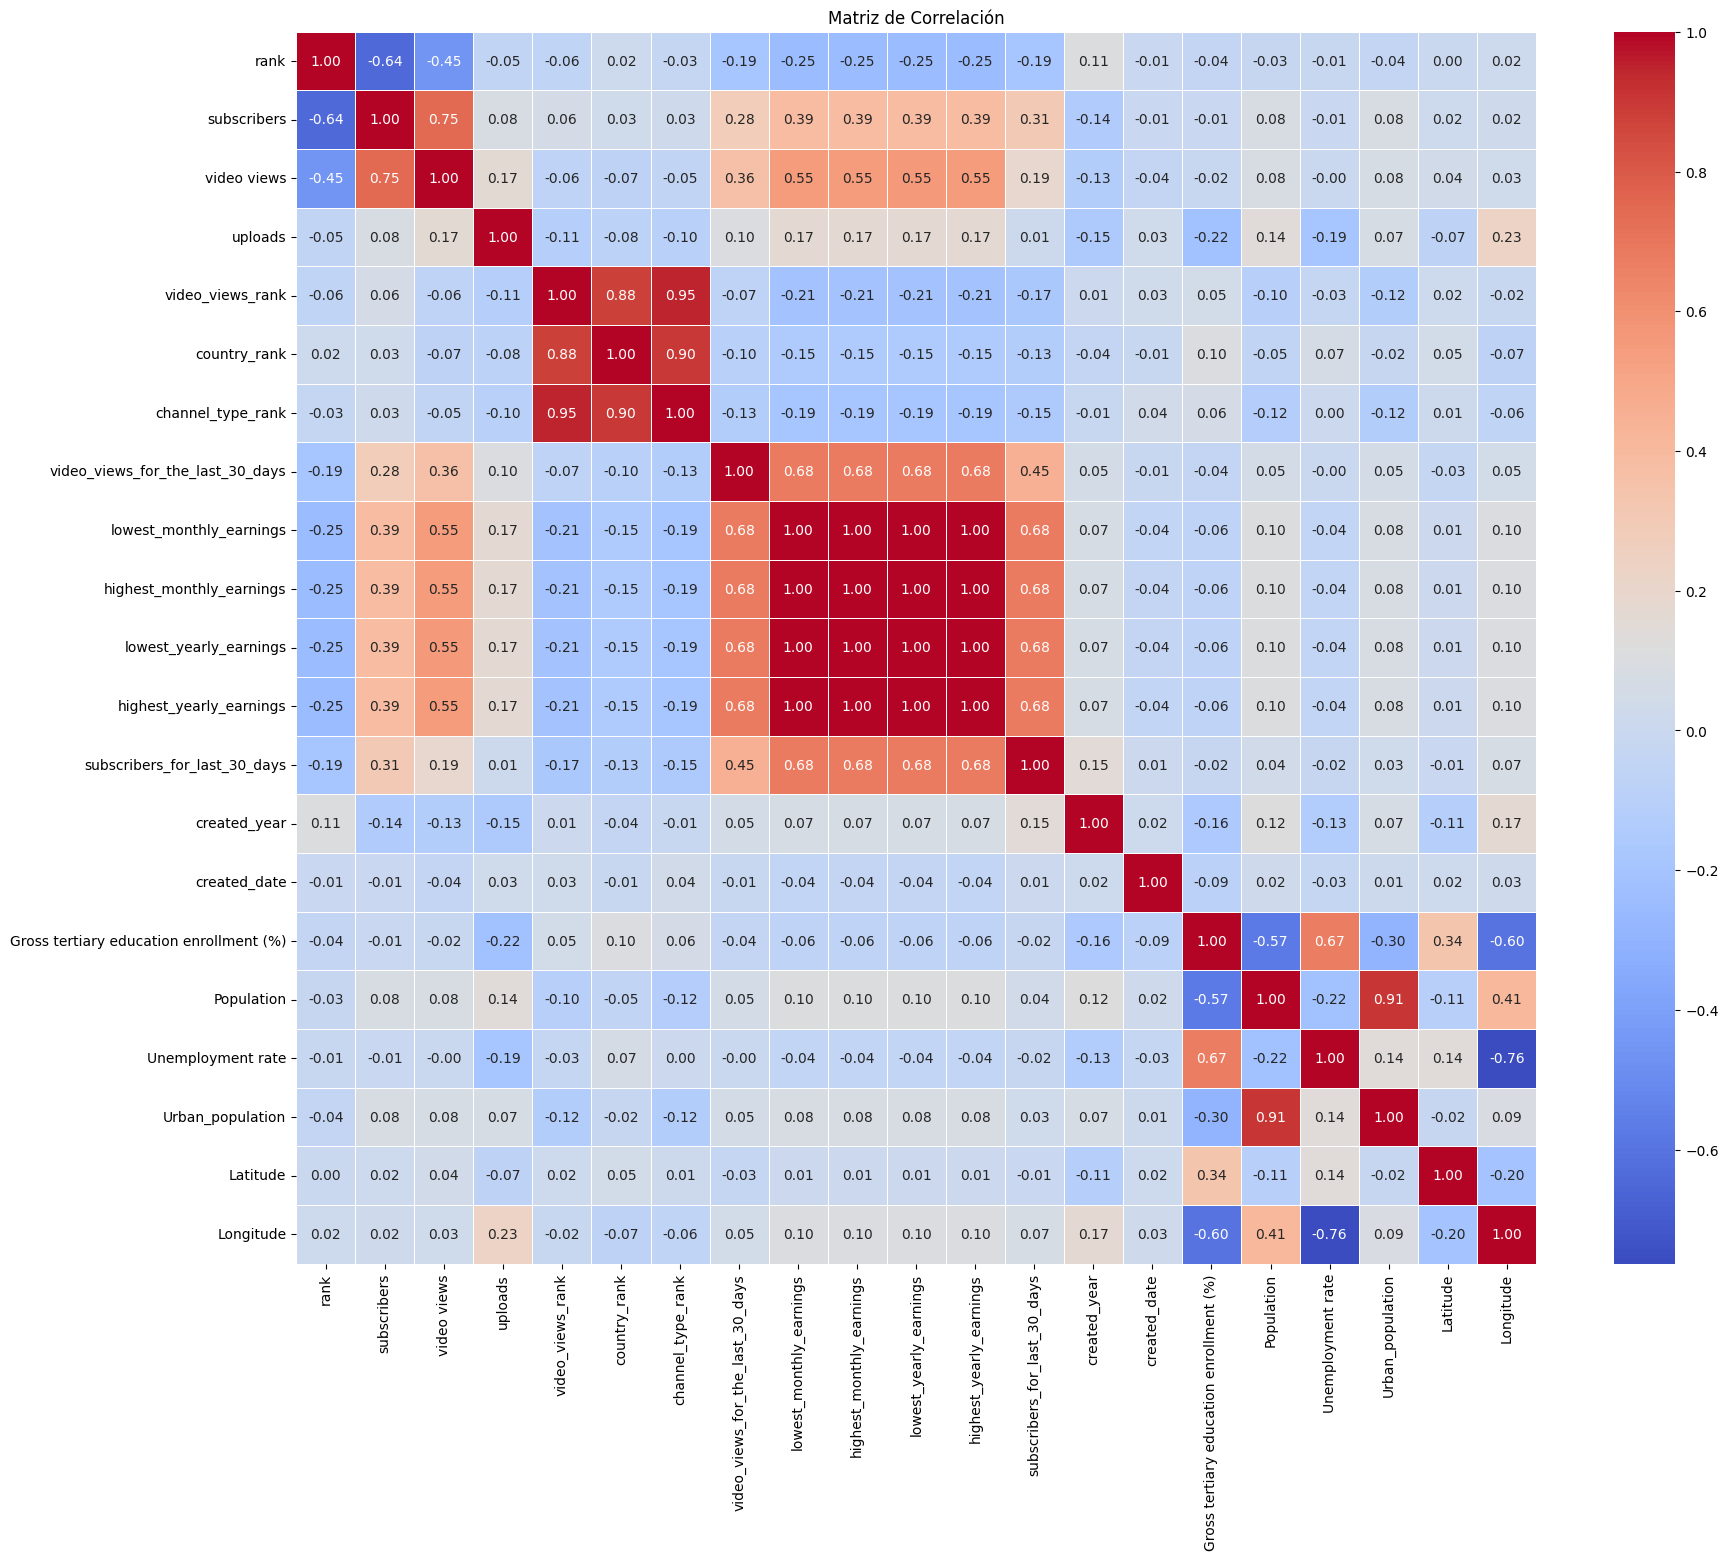

In [6]:
### Análisis de Correlación
# Exclusión de columnas no numéricas
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Configura el estilo de la figura
plt.figure(figsize=(20, 16))

# Crea un mapa de calor con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añade título
plt.title("Matriz de Correlación")

# Muestra la visualización
plt.show()

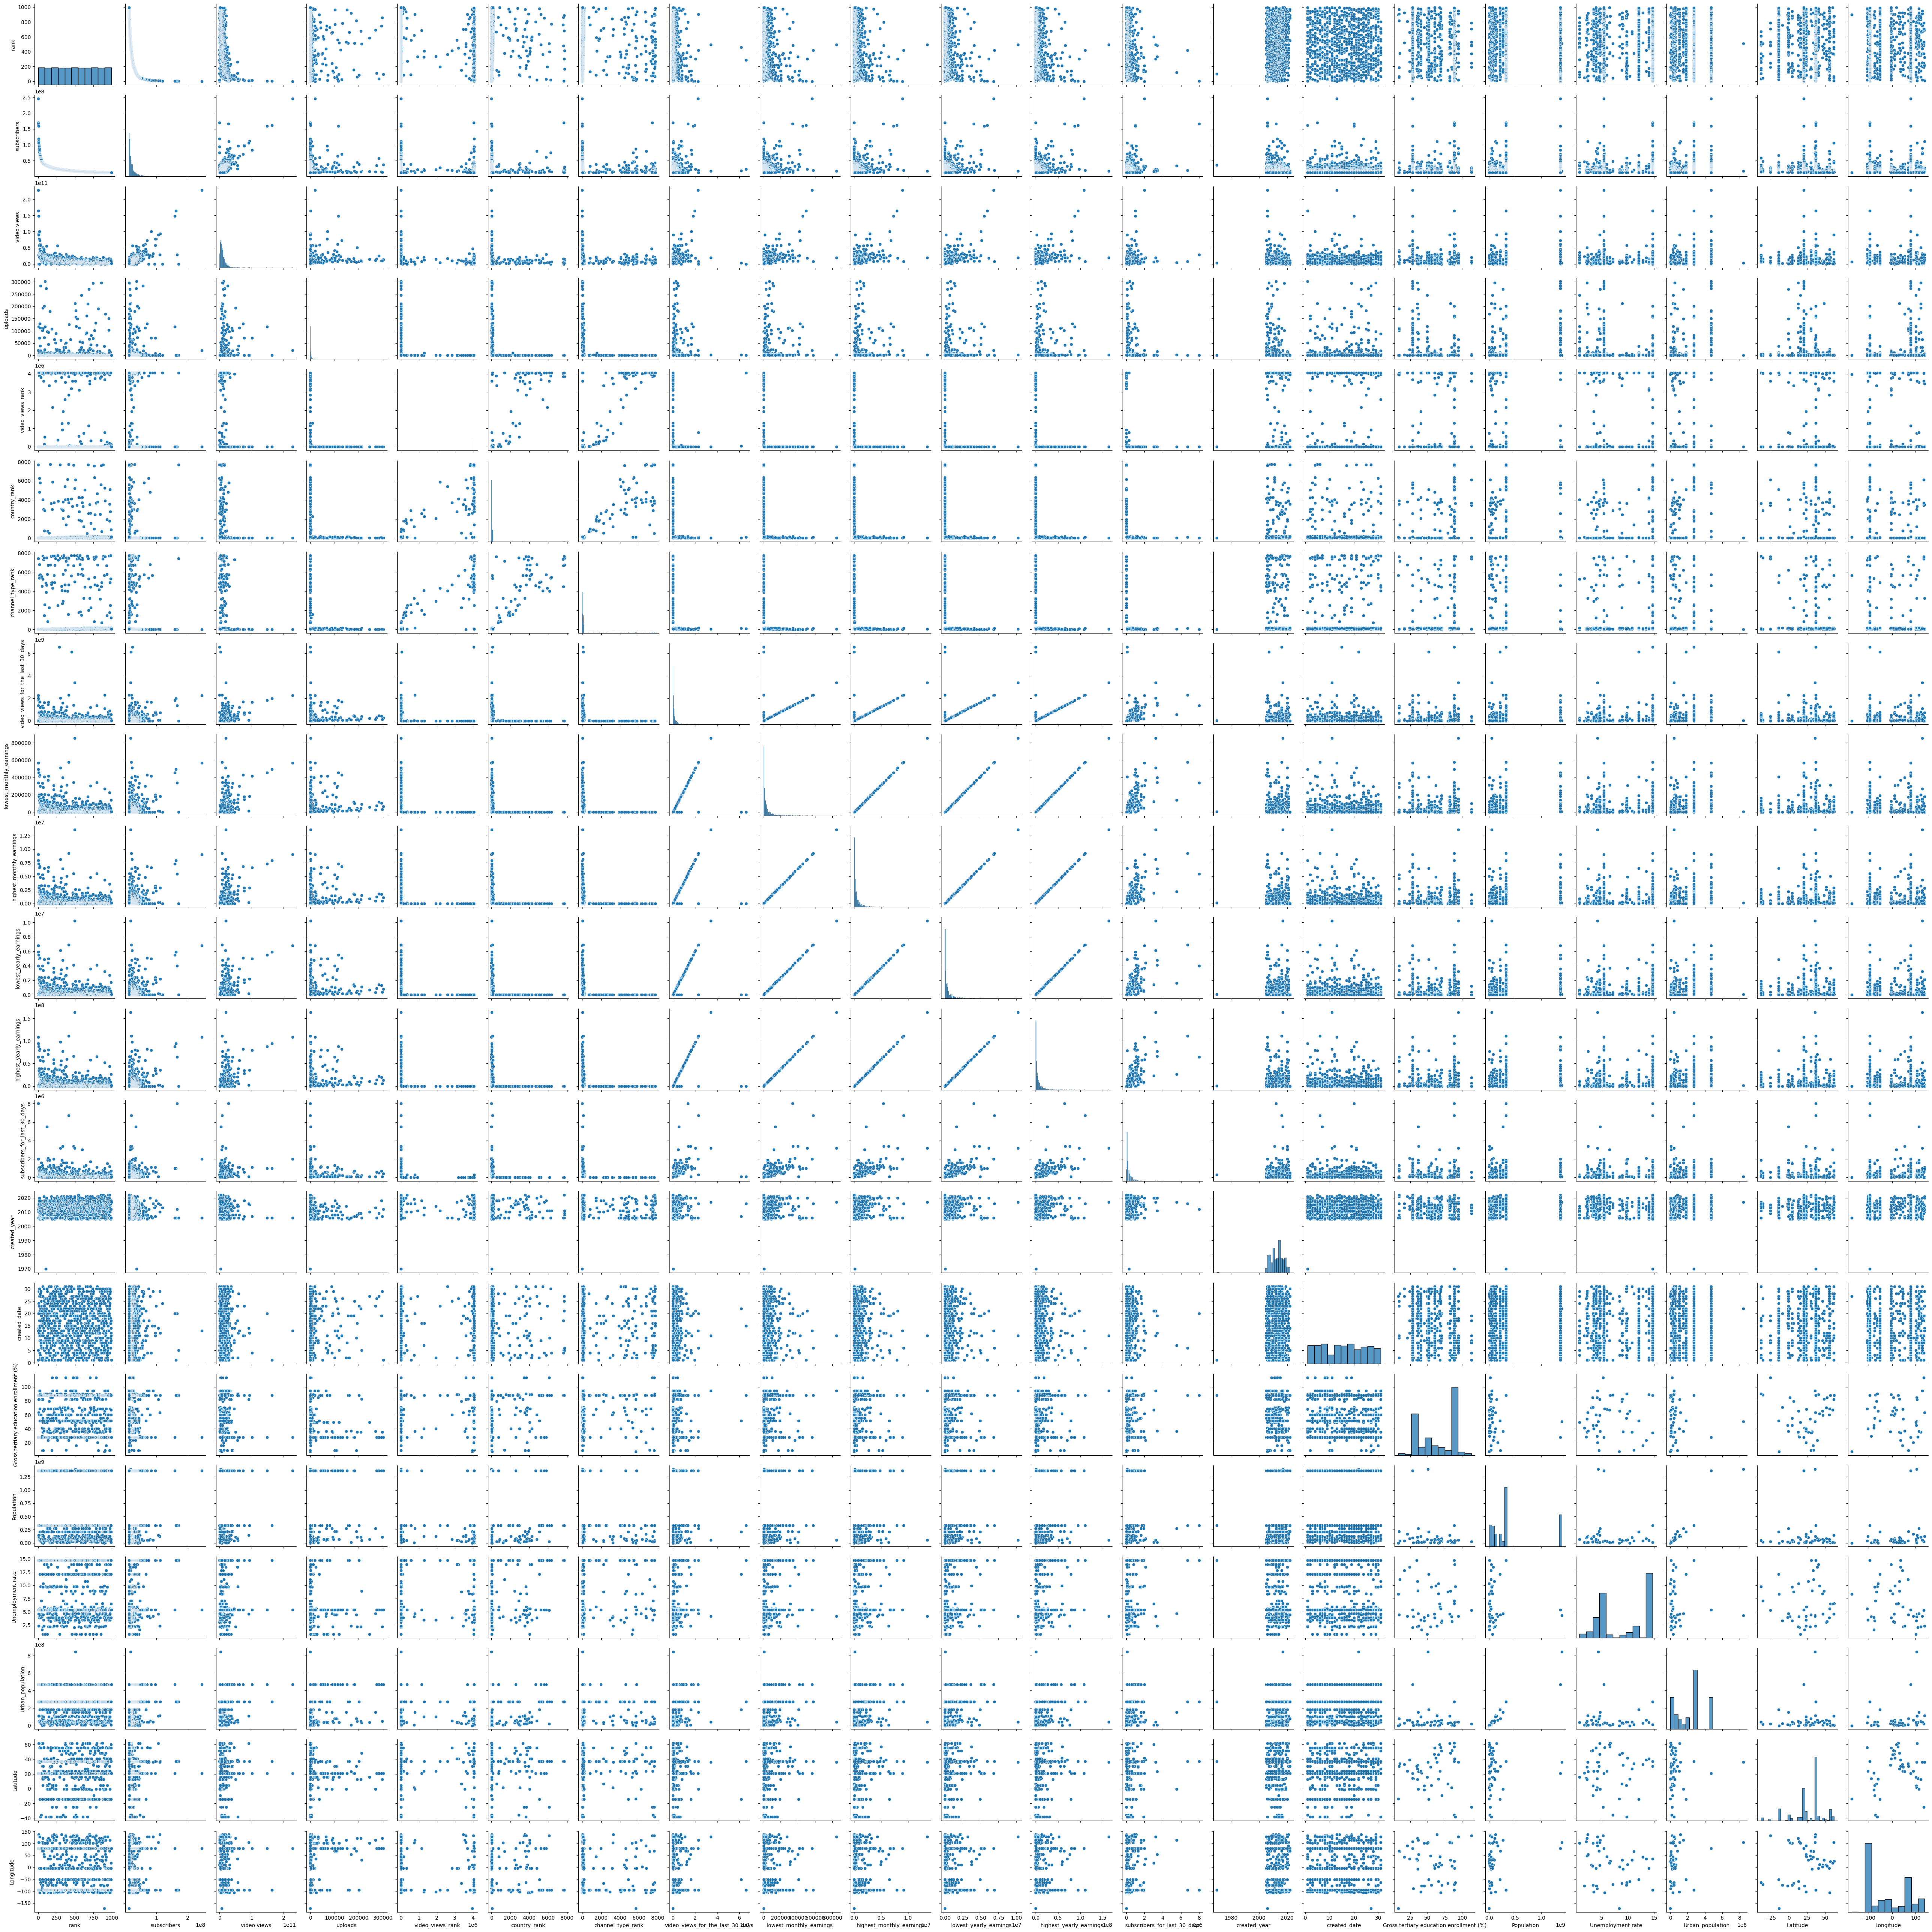

In [18]:
sns.pairplot(df_numeric)

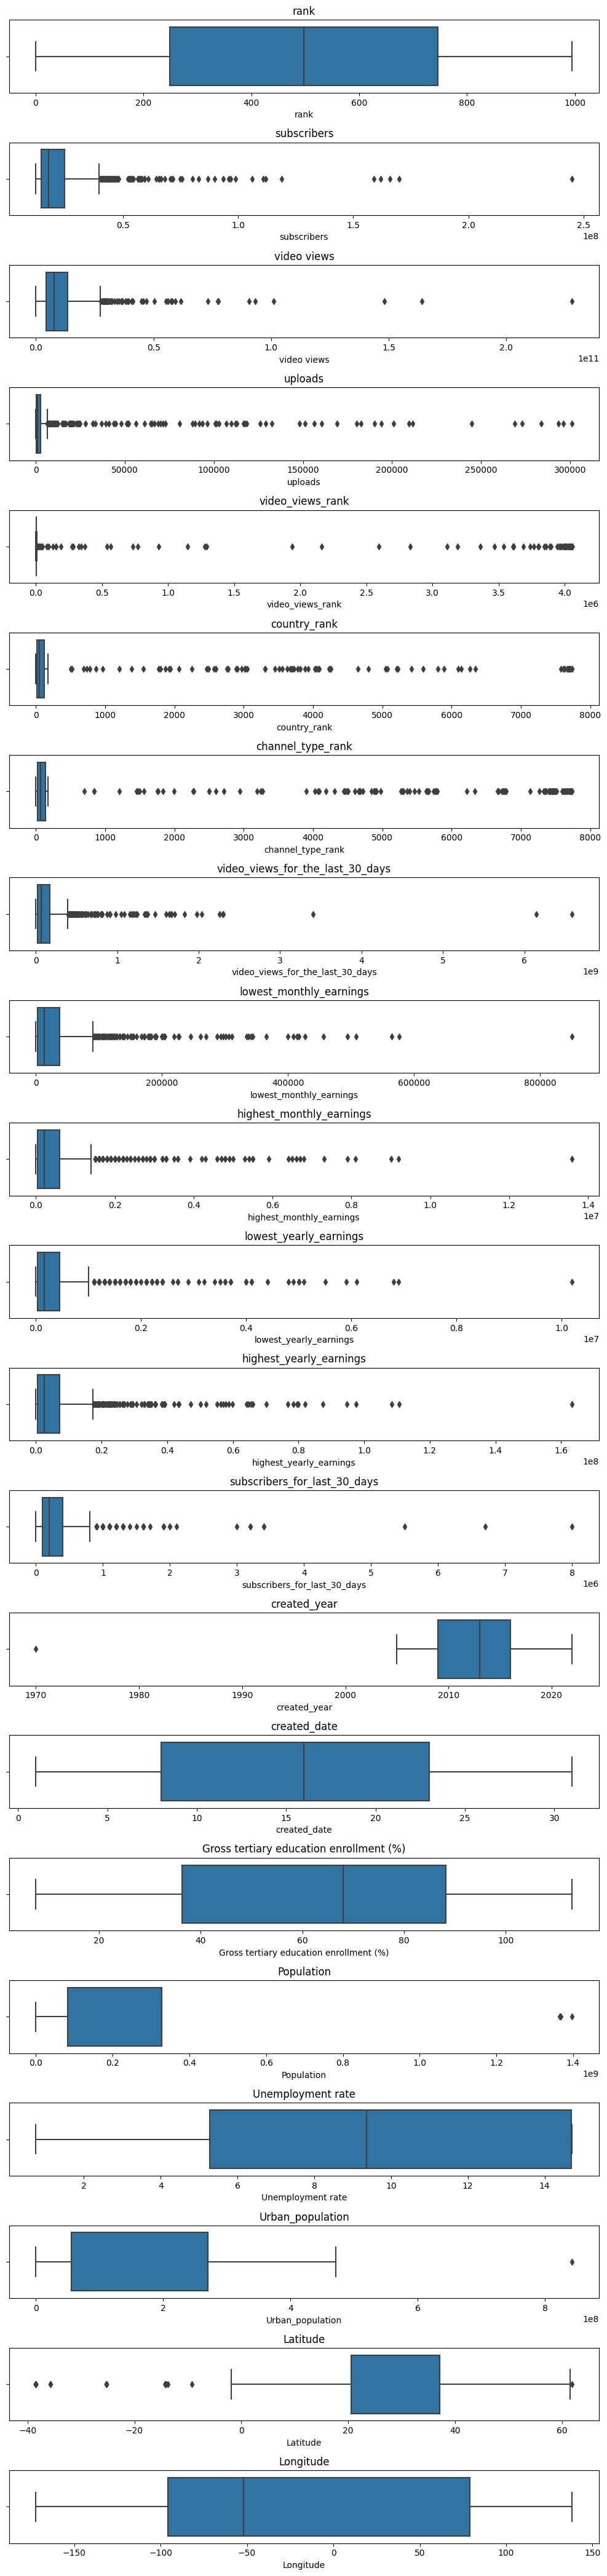

In [7]:
# Supongamos que df es tu DataFrame
num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()



### 2. Limpieza de Outliers y Tratamiento de datos ausentes

In [7]:
# Lista de columnas con outliers
columns_with_outliers = ['subscribers', 'video views', 'uploads', 'video_views_rank',
                          'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
                          'lowest_monthly_earnings', 'highest_monthly_earnings',
                          'lowest_yearly_earnings', 'highest_yearly_earnings',
                          'subscribers_for_last_30_days']

# Definir una función para eliminar outliers basados en el IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers en las columnas especificadas
for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Ahora df no tiene outliers en las columnas especificadas

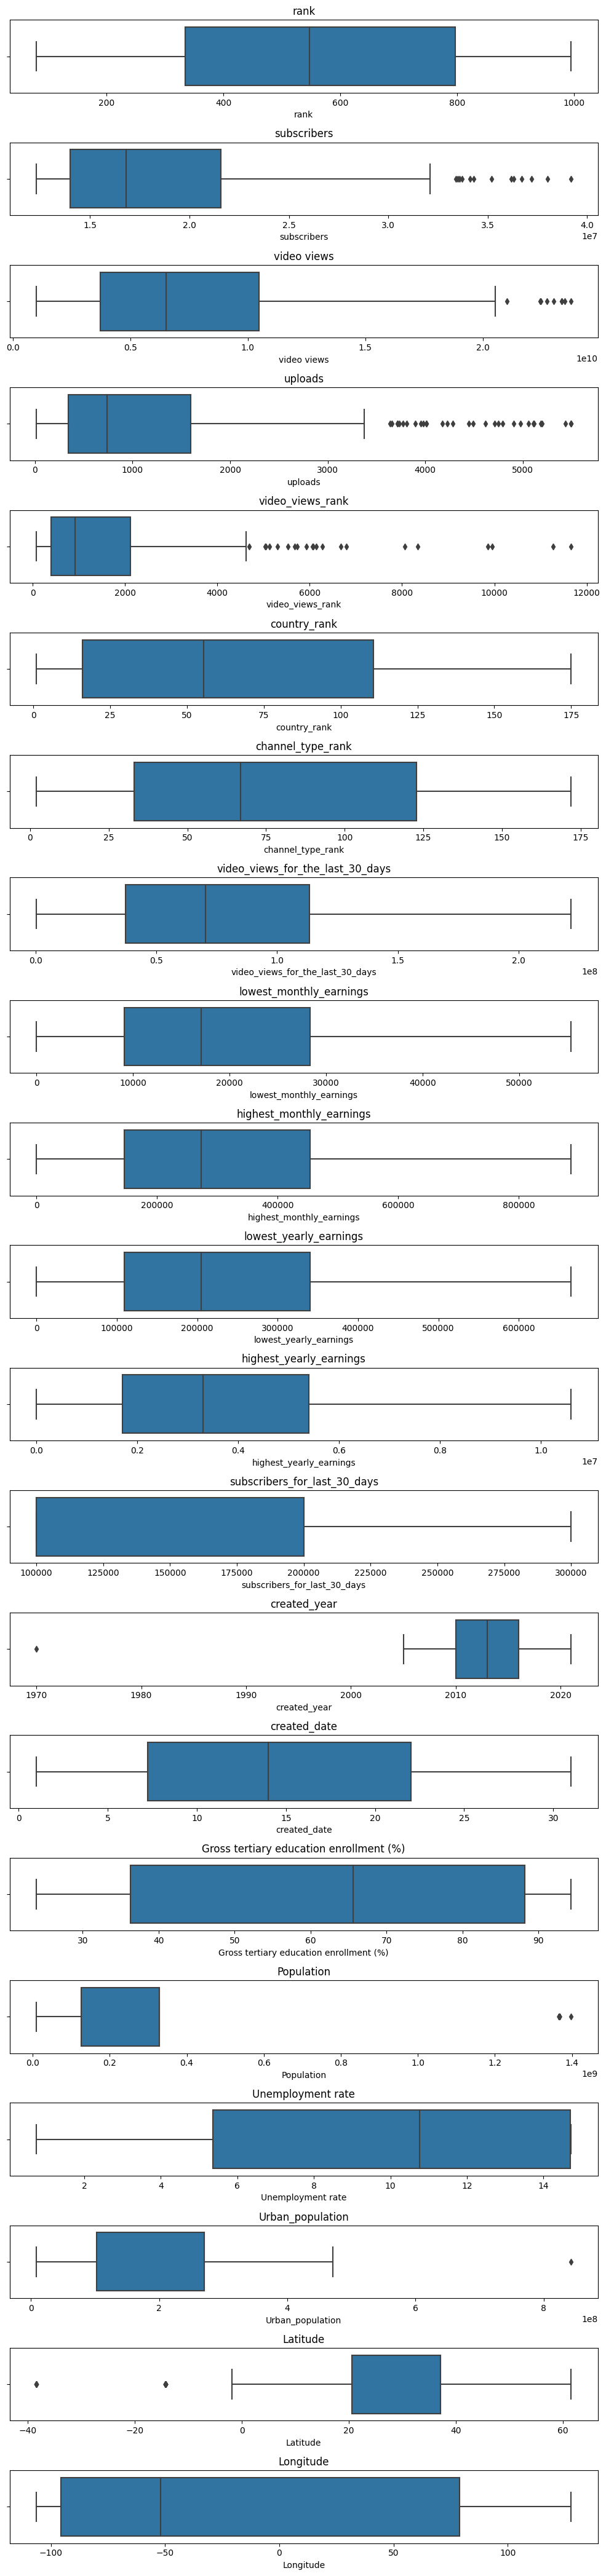

In [8]:
df_numeric = df.select_dtypes(include='number')
# Supongamos que df es tu DataFrame
num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [9]:
df.shape

(278, 28)

In [10]:
df.describe()

rank  subscribers     video views  uploads  video_views_rank  \
count 278.000      278.000         278.000  278.000           278.000   
mean  551.522 18730215.827  7718801274.223 1281.727          1682.820   
std   257.722  5984934.813  5241176440.217 1381.697          1957.286   
min    80.000 12300000.000  1001465469.000   15.000            82.000   
25%   334.750 14000000.000  3711501192.000  339.000           405.250   
50%   547.500 16800000.000  6508506816.000  741.500           915.500   
75%   796.750 21575000.000 10484225722.750 1598.000          2117.750   
max   995.000 39200000.000 23755792542.000 5494.000         11662.000   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count       278.000            278.000                           278.000   
mean         67.371             76.475                      81634740.194   
std          54.526             50.003                      54380677.624   
min           1.000              2.000                        413774.000   
25%          16.000             33.000                      37285000.000   
50%          55.500             67.000                      70343500.000   
75%         110.750            122.750                     113511500.000   
max         175.000            172.000                     221702000.000   

       lowest_monthly_earnings  highest_monthly_earnings  ...  \
count                  278.000                   278.000  ...   
mean                 20181.770                322913.309  ...   
std                  13746.015                219933.793  ...   
min                      0.000                     0.000  ...   
25%                   9100.000                145400.000  ...   
50%                  17050.000                272800.000  ...   
75%                  28375.000                453400.000  ...   
max                  55400.000                886800.000  ...   

       highest_yearly_earnings  subscribers_for_last_30_days  created_year  \
count                  278.000                       278.000       278.000   
mean               3874890.647                    144964.029      2012.824   
std                2642825.850                     67121.035         4.533   
min                      0.000                    100000.000      1970.000   
25%                1700000.000                    100000.000      2010.000   
50%                3300000.000                    100000.000      2013.000   
75%                5400000.000                    200000.000      2016.000   
max               10600000.000                    300000.000      2021.000   

       created_date  Gross tertiary education enrollment (%)     Population  \
count       278.000                                  273.000        273.000   
mean         14.536                                   63.336  450614393.835   
std           8.794                                   25.231  473525264.804   
min           1.000                                   23.900    9770529.000   
25%           7.250                                   36.300  126014024.000   
50%          14.000                                   65.600  328239523.000   
75%          22.000                                   88.200  328239523.000   
max          31.000                                   94.300 1397715000.000   

       Unemployment rate  Urban_population  Latitude  Longitude  
count            273.000           273.000   273.000    273.000  
mean               9.665     238022633.363    27.224    -23.578  
std                4.835     152195937.578    19.996     80.290  
min                0.750       8479744.000   -38.416   -106.347  
25%                5.360     102626859.000    20.594    -95.713  
50%               10.760     270663028.000    37.090    -51.925  
75%               14.700     270663028.000    37.090     78.963  
max               14.720     842933962.000    61.524    127.767  

[8 rows x 21 columns]

In [11]:
### Identificación de datos ausentes
df.isnull().sum()

rank                                        0
Youtuber                                    0
subscribers                                 0
video views                                 0
category                                   15
Title                                       0
uploads                                     0
Country                                     5
Abbreviation                                5
channel_type                                0
video_views_rank                            0
country_rank                                0
channel_type_rank                           0
video_views_for_the_last_30_days            0
lowest_monthly_earnings                     0
highest_monthly_earnings                    0
lowest_yearly_earnings                      0
highest_yearly_earnings                     0
subscribers_for_last_30_days                0
created_year                                0
created_month                               0
created_date                      

In [12]:
### Eliminar filas con valores nulos
df = df.dropna()

In [13]:
df.shape

(258, 28)

## 3. Creación de Features

### Creación de nueva Feature "years_since_creation": Tiempo transcurrido desde la creación del canal

**Ejemplo Práctico**
Supongamos que tenemos datos sobre la fecha de creación de canales de YouTube. Podemos aplicar Feature Engineering para crear una nueva feature que represente el tiempo transcurrido desde la creación del canal. Esta nueva característica podría capturar tendencias temporales y mejorar la comprensión del modelo sobre la evolución del canal.

In [14]:
# Redondea los valores en la columna 'created_year' y maneja los valores no finitos
df['created_year'] = df['created_year'].apply(lambda x: round(x) if pd.notna(x) and pd.notnull(x) and x != float('inf') and x != float('-inf') else x).astype('Int64')

# Convierte la columna 'created_year' a tipo datetime
df['created_year_date'] = pd.to_datetime(df['created_year'], format='%Y', errors='coerce')

# Calcula el tiempo transcurrido desde la creación en años
current_date = datetime.now()
df['years_since_creation'] = (current_date - df['created_year_date']).dt.days / 365.25


In [15]:
# Configura pandas para que muestre todas las columnas
pd.set_option('display.max_columns', None)

df

rank                  Youtuber  subscribers     video views  \
79     80              XXXTENTACION     39200000 10507474316.000   
90     91              Daddy Yankee     38000000 22731415608.000   
94     95         Jkk Entertainment     37200000 16402066717.000   
97     98                Bruno Mars     36700000 19378155425.000   
101   102                   YouTube     36300000  3010784935.000   
..    ...                       ...          ...             ...   
980   981                  Zee Kids     12400000  7683670251.000   
984   985      bharatzkitchen HINDI     12400000  2315226648.000   
989   990                 Migos ATL     12400000  6993406259.000   
991   992  Free Fire India Official     12300000  1674409945.000   
994   995              Make Joke Of     12300000  2129773714.000   

             category                     Title  uploads        Country  \
79              Music              XXXTENTACION      133  United States   
90              Music              Daddy Yankee      505  United States   
94             Comedy         Jkk Entertainment      220          India   
97              Music                Bruno Mars       99  United States   
101   News & Politics                   YouTube      744  United States   
..                ...                       ...      ...            ...   
980  Film & Animation                  Zee Kids     1212          India   
984     Howto & Style      bharatzkitchen HINDI      729          India   
989             Music                 Migos ATL       99  United States   
991    People & Blogs  Free Fire India Official     1500          India   
994            Comedy              Make Joke Of       62          India   

    Abbreviation   channel_type  video_views_rank  country_rank  \
79            US          Music           403.000        24.000   
90            US          Music            92.000        27.000   
94            IN         Comedy           178.000        24.000   
97            US          Music           134.000        30.000   
101           US  Entertainment          2860.000        32.000   
..           ...            ...               ...           ...   
980           IN  Entertainment           709.000       124.000   
984           IN          Howto          4042.000       124.000   
989           US  Entertainment           833.000       175.000   
991           IN          Games          6141.000       125.000   
994           IN         Comedy          4568.000       125.000   

     channel_type_rank  video_views_for_the_last_30_days  \
79              29.000                      58362000.000   
90              33.000                     205594000.000   
94               3.000                      49861000.000   
97              34.000                     175243000.000   
101              5.000                      21103000.000   
..                 ...                               ...   
980            172.000                      95163000.000   
984             38.000                      30968000.000   
989            171.000                      49412000.000   
991             69.000                      64735000.000   
994             44.000                      24000000.000   

     lowest_monthly_earnings  highest_monthly_earnings  \
79                 14600.000                233400.000   
90                 51400.000                822400.000   
94                 12500.000                199400.000   
97                 43800.000                701000.000   
101                 5300.000                 84400.000   
..                       ...                       ...   
980                23800.000                380700.000   
984                 7700.000                123900.000   
989                12400.000                197600.000   
991                16200.000                258900.000   
994                 6000.000                 96000.000   

     lowest_yearly_earnings  highest_yearly_earnings  \
79      

### 4. Manejo de Datos Categóricos
### ¿Cómo hace la máquina para leer valores categóricos, es decir, texto de categorías? Solución: One-Hot Encoding

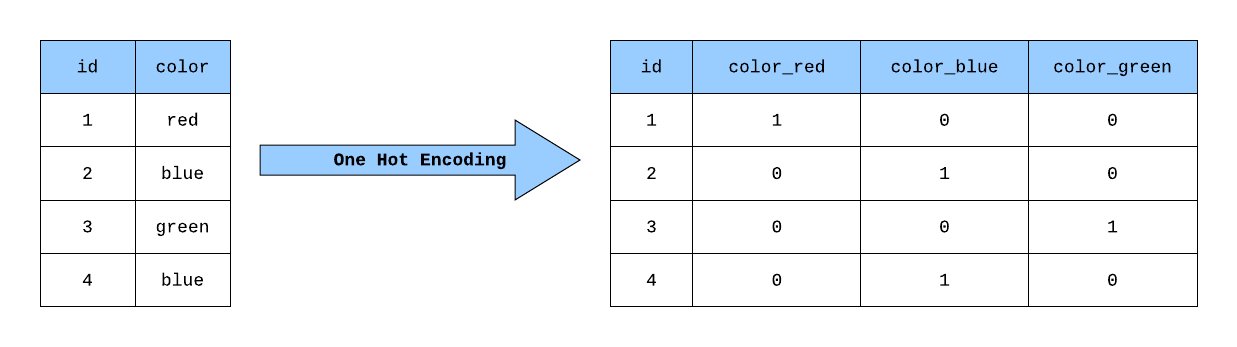

In [16]:
# Especifica la ruta de la imagen local
ruta_imagen = 'one_hot_encoding.png'

# Muestra la imagen en el notebook
Image(filename=ruta_imagen)

In [16]:
# Aplicar One-Hot Encoding a la variable 'channel_type'
df = pd.get_dummies(df, columns=['category'], dtype=int)

In [17]:
df

rank                  Youtuber  subscribers     video views  \
79     80              XXXTENTACION     39200000 10507474316.000   
90     91              Daddy Yankee     38000000 22731415608.000   
94     95         Jkk Entertainment     37200000 16402066717.000   
97     98                Bruno Mars     36700000 19378155425.000   
101   102                   YouTube     36300000  3010784935.000   
..    ...                       ...          ...             ...   
980   981                  Zee Kids     12400000  7683670251.000   
984   985      bharatzkitchen HINDI     12400000  2315226648.000   
989   990                 Migos ATL     12400000  6993406259.000   
991   992  Free Fire India Official     12300000  1674409945.000   
994   995              Make Joke Of     12300000  2129773714.000   

                        Title  uploads        Country Abbreviation  \
79               XXXTENTACION      133  United States           US   
90               Daddy Yankee      505  United States           US   
94          Jkk Entertainment      220          India           IN   
97                 Bruno Mars       99  United States           US   
101                   YouTube      744  United States           US   
..                        ...      ...            ...          ...   
980                  Zee Kids     1212          India           IN   
984      bharatzkitchen HINDI      729          India           IN   
989                 Migos ATL       99  United States           US   
991  Free Fire India Official     1500          India           IN   
994              Make Joke Of       62          India           IN   

      channel_type  video_views_rank  country_rank  channel_type_rank  \
79           Music           403.000        24.000             29.000   
90           Music            92.000        27.000             33.000   
94          Comedy           178.000        24.000              3.000   
97           Music           134.000        30.000             34.000   
101  Entertainment          2860.000        32.000              5.000   
..             ...               ...           ...                ...   
980  Entertainment           709.000       124.000            172.000   
984          Howto          4042.000       124.000             38.000   
989  Entertainment           833.000       175.000            171.000   
991          Games          6141.000       125.000             69.000   
994         Comedy          4568.000       125.000             44.000   

     video_views_for_the_last_30_days  lowest_monthly_earnings  \
79                       58362000.000                14600.000   
90                      205594000.000                51400.000   
94                       49861000.000                12500.000   
97                      175243000.000                43800.000   
101                      21103000.000                 5300.000   
..                                ...                      ...   
980                      95163000.000                23800.000   
984                      30968000.000                 7700.000   
989                      49412000.000                12400.000   
991                      64735000.000                16200.000   
994                      24000000.000                 6000.000   

     highest_monthly_earnings  lowest_yearly_earnings  \
79                 233400.000              175100.000   
90                 822400.000              616800.000   
94                 199400.000              149600.000   
97                 701000.000              525700.000   
101                 84400.000               63300.000   
..                        ...                     ...   
980                380700.000              285500.000   
984                123900.000               92900.000   
989                197600.000              148200.000   
991                258900.000              194200.000   
994                 96000.000               72000.

### En el siguiente episodio vamos a estar trabajando, en cómo utilizar todos estos resultados que obtuvimos a partir del Feature Engineering como INPUT para nuestro modelo de Machine Learning que nos va a ayudar a predecir los ingresos de los YouTubers a partir de determinadas Features.

# Vídeo 9 - Machine Learning

### Introducción al Machine Learning en Python

El machine learning (aprendizaje automático) es una rama de la inteligencia artificial que permite a las computadoras aprender sin ser programadas explícitamente, es decir, sin aplicar reglas fijas. Python es un lenguaje clave para el machine learning o ML debido a la gran cantidad de recursos de código abierto que hay disponible al alcance de nuestra mano. A continuación mencionamos algunas de las librerías más utilizadas para correr Machine Learning en Python:

**Librerías Principales:** 

- **Scikit-Learn**: Excelente para arrancar con muchas aplicaciones, clasificadores, regresores, herramientas de clustering y mucho más.
- **TensorFlow:** Librería con foco en redes neuronales.
- **Keras:** Interfaz de alto nivel sobre TensorFlow.
- **PyTorch:** Ideal para computer vision y NLP (Natural Language Processing)

### Existen diferentes categorías dentro de Machine Learning, en este vídeo me gustaría hablarte solo de dos:


- **Aprendizaje supervisado**: En el aprendizaje supervisado la computadora va a aprender a partir de un dataset de entrenamiento para entender como las diferentes features interactuan e impactan en una determinada variable resultado o etiqueta. En el caso de nuestro ejemplo este se va a tratar de un aprendizaje supervisado porque nos vamos a enfocar en entrenar a la computadora con datos de prueba sabiendo y mostrandole a la máquina el resultado de cada etiqueta para que esta aprenda. Un ejemplo fácil de entender sería querer enseñarle a la computadora a reconocer gatos en fotos. Le muestras muchas fotos de gatos y le dices "esto es un gato". Luego, cuando le muestras una nueva foto, la computadora intenta adivinar si hay un gato en ella. Si se equivoca, le dices cuál era la respuesta correcta, y así la computadora aprende poco a poco a reconocer gatos por sí misma. Es un proceso de entrenamiento con retroalimentación constante.

- **Aprendizaje no supervisado**: En el aprendizaje no supervisado, la computadora no recibe respuestas correctas explicitas. En lugar de eso, la máquina busca patrones o estructuras en los datos por sí misma. Imagina que le das a la computadora un montón de fotos, pero no le decis qué hay en ellas. La computadora intenta encontrar patrones o agrupaciones sin que le digas qué está buscando. Por ejemplo, podría descubrir automáticamente que algunas fotos son de gatos y otras de perros sin que le hayas dicho previamente qué es cada cosa. Es como si la máquina intentara encontrar orden o significado en los datos por sí misma.

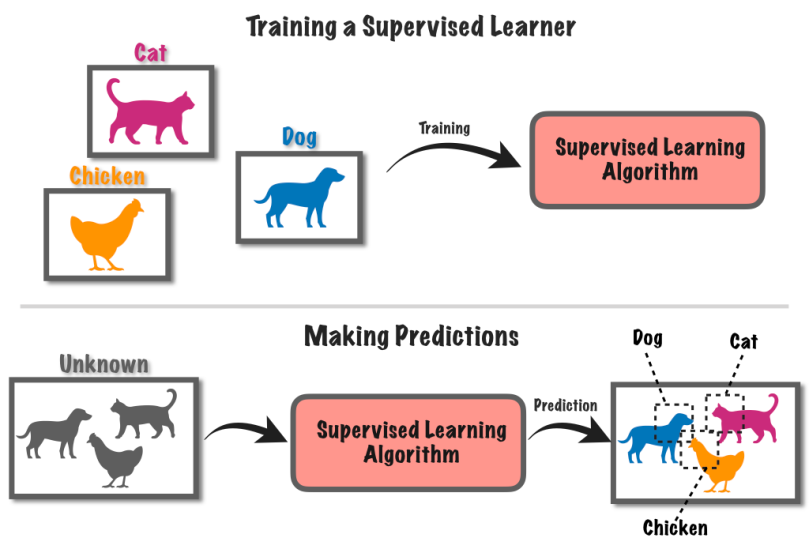

In [18]:
# Especifica la ruta de la imagen local
ruta_imagen = 'perros.png'

# Muestra la imagen en el notebook
Image(filename=ruta_imagen)

### Predictor de ganancias de YouTubers

En este vídeo nos vamos a enfocar en crear un predictor de ganancias anuales de YouTubers. Nuestra etiqueta "Y" va a ser la variable objetivo, es decir, la variable que vamos a querer predecir en función de ciertas features (columnas).

Vamos a desarrollar este proceso en diferentes pasos, arranquemos!

# 1. Importamos las librerías de Machine Learning

In [19]:
### Primero correr pip install scikit-learn en la Terminal o CMD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


# 2. Selección de Features

In [20]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'Title', 'uploads',
       'Country', 'Abbreviation', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings',
       'subscribers_for_last_30_days', 'created_year', 'created_month',
       'created_date', 'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'created_year_date', 'years_since_creation',
       'category_Autos & Vehicles', 'category_Comedy', 'category_Education',
       'category_Entertainment', 'category_Film & Animation',
       'category_Gaming', 'category_Howto & Style', 'category_Movies',
       'category_Music', 'category_News & Politics', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_

In [21]:
### En función del análisis de Feature Engineering que hicimos en el vídeo pasado, seleccionamos las siguientes features para utilizar como predictores en nuestro modelo
### En este proceso inicial la idea es usar el sentido común, y los insights e información que obtuvimos en el EDA y en el proceso de Feature Engineering (a partir de gráficos y de las descripciones estadísticas)
### En el futuro hay modelos y algoritmos dentro de sci-kit learn mismo que nos pueden ayudar a automatizar este proceso, por el momento usemos el sentido común.

selected_features = ['subscribers', 'video views', 'uploads',
       'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 'Population','years_since_creation',
       'category_Autos & Vehicles', 'category_Comedy', 'category_Education',
       'category_Entertainment', 'category_Film & Animation',
       'category_Gaming', 'category_Howto & Style', 'category_Movies',
       'category_Music', 'category_News & Politics', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_Shows', 'category_Sports']

# 3. División de Datos (Entrenamiento/Train del modelo y Prueba/Test)

In [22]:
# Definir variables predictoras (X) y la variable objetivo (y)
X = df[selected_features]
y = df['highest_yearly_earnings']

### División de datos en conjuntos de entrenamiento y prueba

- **test_size:** Este parámetro determina la proporción de datos que se asignarán al conjunto de prueba. En este caso, test_size=0.2 significa que el 20% de los datos se utilizarán como conjunto de prueba, mientras que el 80% se utilizará como conjunto de entrenamiento. Esta proporción es una elección común, pero puede ajustarse según la cantidad de datos que tengas y tus preferencias. Un valor típico puede estar en el rango de 0.2 a 0.3.

- **random_state:** Este parámetro se utiliza para garantizar que la división de datos sea reproducible. Cuando estableces un valor específico para random_state (en este caso, 42), obtendrás la misma división de datos cada vez que ejecutes el código. Esto es útil para reproducir resultados y para que otros puedan obtener los mismos resultados al usar tu código. La elección del número específico (42 en este caso) es arbitraria; podrías usar cualquier número entero.

In [23]:
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenamiento del modelo

In [24]:
# Inicializar el modelo de regresión (puedes cambiar el algoritmo según prefieras)
# Documentación del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

# 5. Predicciones del modelo

In [26]:
predictions = model.predict(X_test)

In [27]:
predictions

array([ 3800517.25830369,  5911985.01571051,  5528102.14923422,
         672127.89123341,   780654.8621026 ,  2608219.38455588,
        4209422.91737051,   257216.54171072,  3391013.78433106,
         701263.5491325 ,  3367569.64818114,  6706274.00738599,
        1443400.24604281,  -281540.34800837,  6892000.42527403,
        2625830.23299388,  4830360.96245356,  2823585.57613606,
        4776328.90961014,  2279673.67041893,  4844290.44575409,
         743368.1973223 , 10416961.75904785,   924220.49964596,
        1586359.21494492,  9113903.47662305,  2232544.89172542,
        2553321.48051583,  1485099.36577155,  7931116.40931607,
        5205794.92178044, 10258896.35880003,  1363030.52058093,
        4642584.0361364 ,  1102054.36202054,   384347.58709953,
        8837513.21298311,  2238692.56927994,  1080793.52202403,
        6847599.49003562,  4146888.53235981,  1178523.95848506,
        4137487.92123064,  1603077.77831241,  6178257.07208398,
        3881581.84293387,  2955145.62679

# 6. Evaluación del modelo

### **R-squared**

El coeficiente de determinación (R-squared) es una métrica que indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes en un modelo de regresión. Se calcula como la proporción de la varianza explicada con respecto a la varianza total. 

En otras palabras, R-squared mide qué tan bien las predicciones del modelo se ajustan a los datos observados.

El R-squared varía entre 0 y 1, donde:

- 0 indica que el modelo no explica la variabilidad de la variable dependiente.
- 1 indica que el modelo explica toda la variabilidad de la variable dependiente.

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}

In [28]:
# Calcula el R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

R-squared: 0.9687962443755248


### **Error cuadrático medio MSE y RMSE**

El error cuadrático medio (MSE, por sus siglas en inglés, Mean Squared Error) es una métrica que mide el promedio de los cuadrados de los errores entre las predicciones de un modelo y los valores reales. Cuanto más bajo sea el valor del MSE, mejor será el rendimiento del modelo, ya que indica que las predicciones están más cerca de los valores reales.

La fórmula para calcular el MSE es la siguiente:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{valor real}_i - \text{predicción}_i)^2 $$

La fórmula para calcular el RMSE es la siguiente, básicamente es la raiz cuadrada del MSE:
$$ RMSE = \sqrt{MSE}


In [29]:
# Calcular MSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Imprimir el resultado
print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')

Test RMSE: 480360.16221418336
Test MSE: 230745885442.43655


### **Gráfico de dispersión**

En este gráfico, cada punto representa una observación en tus datos de prueba. Si el modelo fuera perfecto, todos los puntos deberían estar en una línea diagonal. Sin embargo, en la realidad, es probable que haya alguna dispersión alrededor de esa línea, y el objetivo es minimizar esa dispersión.

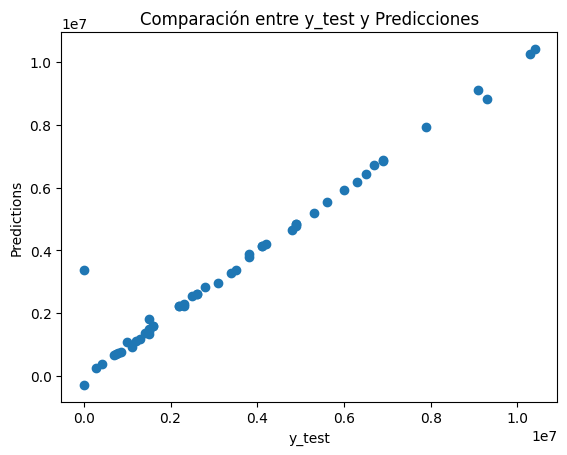

In [30]:
# Gráfico de dispersión
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Comparación entre y_test y Predicciones')
plt.show()

### **Tabla Test vs. Predicciones**

En esta tabla comparamos exactamente para ciertas filas del dataset de test (es decir, datos a los que la máquina nunca tuvo acceso, son datos que tranquilamente pueden ser nuevos para el modelo extraídos de casos actuales de canales de YouTube reales) los valores de predicción de ingresos anuales versus los valores reales.

In [31]:
# Configurar el formato de visualización para números de punto flotante
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Crear un dataframe con las columnas requeridas
result_table = pd.DataFrame({
    'Nombre del canal': df.loc[X_test.index, 'Youtuber'],
    'Predicción': predictions,
    'Earnings Anuales Real': y_test,
})

# Calcular la diferencia entre las predicciones y los earnings reales
result_table['Diferencia'] = result_table['Earnings Anuales Real'] - result_table['Predicción']

# Ordenar el DataFrame por la columna 'earnings' de mayor a menor
result_table = result_table.sort_values(by='Earnings Anuales Real', ascending=False)

In [32]:
result_table

Nombre del canal   Predicción  \
820                       Think Music India 10416961.759   
928                        Right to Shiksha 10258896.359   
333                            DUDU e CAROL  8837513.213   
154                          ImagineDragons  9113903.477   
611                             Unspeakable  7931116.409   
287                               Lady Gaga  6892000.425   
203                            Brent Rivera  6847599.490   
246                              EminemVEVO  6706274.007   
632                    ýýýýýýýý ýý ýýýýýýýý  6434112.353   
692           A2 Motivation by Arvind Arora  6178257.072   
285                           Sesame Street  5911985.016   
123                            Selena Gomez  5528102.149   
179                       infobells - Tamil  5205794.922   
115                                Geet MP3  4830360.962   
451                         Shemaroo Comedy  4776328.910   
199                               Crazy XYZ  4844290.446   
813                                 Airrack  4642584.036   
821                O Que Nï¿½ï¿½ï¿½ï¿½ï¿½ï¿  4209422.917   
381                       Got Talent Global  4146888.532   
621                       Zee Music Classic  4137487.921   
721                             Netflix Jr.  3881581.843   
354                        Lyrical Lemonade  3800517.258   
536                        Pop Chartbusters  3391013.784   
760                 Indore Physical Academy  3284534.591   
991                Free Fire India Official  2955145.627   
230                      Rans Entertainment  2823585.576   
477                         Manual do Mundo  2625830.233   
462   RsiamMusic : ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½  2608219.385   
881                   The Infographics Show  2553321.481   
744                        Aadishakti Films  2232544.892   
311                      Goldmines Cineplex  2279673.670   
669   Mohamed Ramadan I ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï  2225734.063   
519                                   Apple  2238692.569   
583                                   T3ddy  1603077.778   
681                                XpressTV  1586359.215   
903                               Lofi Girl  1485099.366   
420                                DLS News  1809217.890   
984                    bharatzkitchen HINDI  1443400.246   
156                              Round2hell  1333408.552   
356  Dr. Vivek Bindra: Motivational Speaker  1363030.521   
171                 ashish chanchlani vines  1178523.958   
126                        KHANDESHI MOVIES  1102054.362   
561         ýýýýýýýý ýýýýýýýýýýýýýýýýýýýýýý   924220.500   
433                     ýýýýýýýýýýýýýý ýýýý  1080793.522   
579                             Technoblade   780654.862   
725                                Doc Tops   743368.197   
834                        Lindsey Stirling   701263.549   
376                               Jake Paul   672127.891   
484                            David Dobrik   384347.587   
944                            CaseyNeistat   257216.542   
358                        Brave Wilderness  -281540.348   
404        Green Gold TV - Official Channel  3367569.648   

     Earnings Anuales Real   Diferencia  
820           10400000.000   -16961.759  
928           10300000.000    41103.641  
333            9300000.000   462486.787  
154            9100000.000   -13903.477  
611            7900000.000   -31116.409  
287            6900000.000     7999.575  
203            6900000.000    52400.510  
246            6700000.000    -6274.007  
632            6500000.000    65887.647  
692            6300000.000   121742.928  
285            6000000.000    88014.984  
123            5600000.000    71897.851  
179            5300000.000    94205.078  
115            4900000.000    69639.038  
451            4900000.000   123671.090  
199            4900000.000    55709.554  
813            4800000.000   157415.964  
821            4200000.000    -9422.917  
381            4100000.000   -46888.532  
621   

# 7. Análisis del modelo

In [33]:
# Obtener los coeficientes
coefficients = model.coef_

# Crear un DataFrame para mostrar los coeficientes junto con el nombre de la variable
coefficients_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': coefficients})

# Ordenar el DataFrame por coeficientes de mayor a menor
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Mostrar el DataFrame con los coeficientes
print(coefficients_df)

                            Variable  Coefficient
16          category_News & Politics   692578.893
9                 category_Education   445540.972
11         category_Film & Animation   440077.795
19     category_Science & Technology   420221.265
21                   category_Sports   415498.042
8                    category_Comedy   409639.927
20                    category_Shows   405038.074
15                    category_Music   398607.628
12                   category_Gaming   396549.733
17           category_People & Blogs   393584.080
13            category_Howto & Style   393580.682
10            category_Entertainment   345859.859
2                            uploads        3.833
3   video_views_for_the_last_30_days        0.049
18           category_Pets & Animals        0.000
7          category_Autos & Vehicles       -0.000
1                        video views       -0.000
5                         Population       -0.000
0                        subscribers       -0.001


# 8. Bonus Track para practicar en casa
## Replicamos el mismo proceso pero aplicando otro algoritmo de regresión llamado **RandomForestRegressor**
## También aplicamos una técnica llamada cross-validation 

In [34]:
model = RandomForestRegressor()

In [35]:
# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

## **Cross-validation**

Validación cruzada (cross-validation) es una técnica utilizada en machine learning para evaluar el rendimiento de un modelo de manera más robusta y confiable. La idea es dividir el conjunto de datos en varias partes, entrenar y evaluar el modelo varias veces, cambiando qué parte del conjunto de datos se utiliza como conjunto de entrenamiento y cuál como conjunto de prueba en cada iteración.

En términos más simples, en lugar de entrenar y evaluar el modelo una sola vez, la validación cruzada realiza múltiples rondas de entrenamiento y evaluación, promediando los resultados. Esto ayuda a obtener una estimación más precisa del rendimiento del modelo y a reducir el riesgo de que los resultados dependan en gran medida de una única división específica de los datos.

Un método común de validación cruzada es el llamado "k-fold cross-validation", donde el conjunto de datos se divide en k partes (llamadas "folds"), y el modelo se entrena y evalúa k veces, utilizando una parte diferente como conjunto de prueba en cada iteración. Luego se promedian los resultados para obtener una medida global del rendimiento del modelo. Esto ayuda a asegurar que el modelo funcione bien de manera consistente en diferentes partes del conjunto de datos.

In [37]:
# Aplicar cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

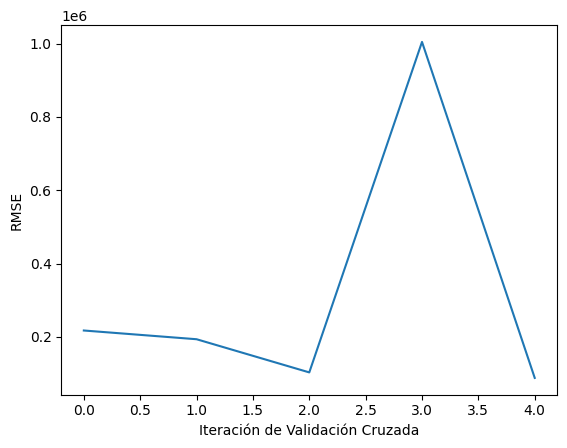

In [38]:
import matplotlib.pyplot as plt

plt.plot(cv_rmse_scores)
plt.xlabel('Iteración de Validación Cruzada')
plt.ylabel('RMSE')
plt.show()

In [39]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calcula el R-squared
r_squared = r2_score(y_test, y_pred)

# Imprimir resultados
print(f'Cross-Validation RMSE: {np.mean(cv_rmse_scores)}')
print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')
print(f'R-squared: {r_squared}')

Cross-Validation RMSE: 321419.148554047
Test RMSE: 480788.1116191294
Test MSE: 231157208274.28845
R-squared: 0.9687406212076262


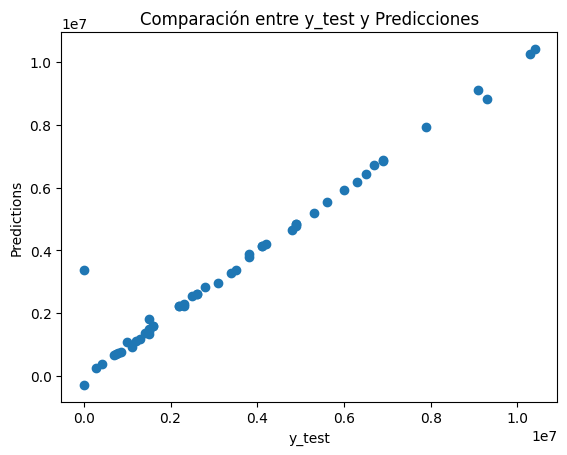

In [40]:
# Gráfico de dispersión
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Comparación entre y_test y Predicciones')
plt.show()

In [41]:
# Configurar el formato de visualización para números de punto flotante
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Crear un dataframe con las columnas requeridas
result_table = pd.DataFrame({
    'Nombre del canal': df.loc[X_test.index, 'Youtuber'],
    'Predicción': y_pred,
    'Earnings Anuales Real': y_test,
})

# Calcular la diferencia entre las predicciones y los earnings reales
result_table['Diferencia'] = result_table['Earnings Anuales Real'] - result_table['Predicción']

# Ordenar el DataFrame por la columna 'earnings' de mayor a menor
result_table = result_table.sort_values(by='Earnings Anuales Real', ascending=False)

In [42]:
result_table

Nombre del canal   Predicción  \
820                       Think Music India 10176000.000   
928                        Right to Shiksha 10161000.000   
333                            DUDU e CAROL  9410000.000   
154                          ImagineDragons  9340000.000   
611                             Unspeakable  7961000.000   
287                               Lady Gaga  6680000.000   
203                            Brent Rivera  6719000.000   
246                              EminemVEVO  6673000.000   
632                    ýýýýýýýý ýý ýýýýýýýý  6601000.000   
692           A2 Motivation by Arvind Arora  6041000.000   
285                           Sesame Street  5960000.000   
123                            Selena Gomez  5617000.000   
179                       infobells - Tamil  5334000.000   
115                                Geet MP3  4902000.000   
451                         Shemaroo Comedy  4910000.000   
199                               Crazy XYZ  4917000.000   
813                                 Airrack  4694000.000   
821                O Que Nï¿½ï¿½ï¿½ï¿½ï¿½ï¿  4255000.000   
381                       Got Talent Global  4156000.000   
621                       Zee Music Classic  4178000.000   
721                             Netflix Jr.  3786000.000   
354                        Lyrical Lemonade  3809000.000   
536                        Pop Chartbusters  3473000.000   
760                 Indore Physical Academy  3384000.000   
991                Free Fire India Official  2882000.000   
230                      Rans Entertainment  2791000.000   
477                         Manual do Mundo  2589000.000   
462   RsiamMusic : ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½  2604000.000   
881                   The Infographics Show  2493000.000   
744                        Aadishakti Films  2226000.000   
311                      Goldmines Cineplex  2203000.000   
669   Mohamed Ramadan I ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï  2208000.000   
519                                   Apple  2210000.000   
583                                   T3ddy  1599000.000   
681                                XpressTV  1637000.000   
903                               Lofi Girl  1471000.000   
420                                DLS News  1521000.000   
984                    bharatzkitchen HINDI  1487000.000   
156                              Round2hell  1399000.000   
356  Dr. Vivek Bindra: Motivational Speaker  1320000.000   
171                 ashish chanchlani vines  1241000.000   
126                        KHANDESHI MOVIES  1179000.000   
561         ýýýýýýýý ýýýýýýýýýýýýýýýýýýýýýý  1118751.000   
433                     ýýýýýýýýýýýýýý ýýýý  1051957.000   
579                             Technoblade   824661.000   
725                                Doc Tops   759514.000   
834                        Lindsey Stirling   669351.000   
376                               Jake Paul   674758.000   
484                            David Dobrik   342635.000   
944                            CaseyNeistat   281491.000   
358                        Brave Wilderness   168425.000   
404        Green Gold TV - Official Channel  3400000.000   

     Earnings Anuales Real   Diferencia  
820           10400000.000   224000.000  
928           10300000.000   139000.000  
333            9300000.000  -110000.000  
154            9100000.000  -240000.000  
611            7900000.000   -61000.000  
287            6900000.000   220000.000  
203            6900000.000   181000.000  
246            6700000.000    27000.000  
632            6500000.000  -101000.000  
692            6300000.000   259000.000  
285            6000000.000    40000.000  
123            5600000.000   -17000.000  
179            5300000.000   -34000.000  
115            4900000.000    -2000.000  
451            4900000.000   -10000.000  
199            4900000.000   -17000.000  
813            4800000.000   106000.000  
821            4200000.000   -55000.000  
381            4100000.000   -56000.000  
621   

In [43]:
# Obtener la importancia de las variables
importances = model.feature_importances_

# Crear un DataFrame para mostrar las importancias
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Ordenar el DataFrame por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame con las importancias de las variables
print(feature_importance_df)

                             Feature  Importance
3   video_views_for_the_last_30_days       0.988
14                   category_Movies       0.009
4       subscribers_for_last_30_days       0.002
1                        video views       0.000
2                            uploads       0.000
5                         Population       0.000
6               years_since_creation       0.000
0                        subscribers       0.000
17           category_People & Blogs       0.000
12                   category_Gaming       0.000
10            category_Entertainment       0.000
8                    category_Comedy       0.000
9                 category_Education       0.000
15                    category_Music       0.000
11         category_Film & Animation       0.000
13            category_Howto & Style       0.000
16          category_News & Politics       0.000
19     category_Science & Technology       0.000
20                    category_Shows       0.000
21                  

El resultado del feature_importance en un modelo de bosque aleatorio (RandomForestRegressor) indica la importancia relativa de cada característica en la predicción del modelo. En este caso, el modelo ha asignado una importancia significativa a la variable "video_views_for_the_last_30_days", mientras que las demás características tienen una importancia cercana a cero.